In [2]:
setwd('/Users/gimdong-wan/Desktop/김동완 수업자료/응용통계학/기말/FinalProject')

In [3]:
library(gridExtra)
library(GGally)
library(ggpubr)
library(tidymodels)
library(tidyverse)
library(skimr)
library(knitr)
library(corrplot) 
library(fmsb)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

─ Attaching packages ─────────────────── tidymodels 0.1.3 ─

✔ broom        0.7.6      ✔ rsample      0.0.9 
✔ dials        0.0.9      ✔ tibble       3.1.1 
✔ dplyr        1.0.6      ✔ tidyr        1.1.3 
✔ infer        0.5.4      ✔ tune         0.1.5 
✔ modeldata    0.1.0      ✔ workflows    0.2.2 
✔ parsnip      0.1.5      ✔ workflowsets 0.0.2 
✔ purrr        0.3.4      ✔ yardstick    0.0.8 
✔ recipes      0.1.16     

─ Conflicts ───────────────────── tidymodels_conflicts() ─
✖ dplyr::combine() masks gridExtra::combine()
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

─ Attaching packages ──────────────────── tidyverse 1.3.1 ─

✔ readr   1.4.0     ✔ forcats 0.5.1
✔ stringr 1.4.0     

─ Conflicts ──────

In [4]:
mn08 <- read_csv('data/mn08.csv')
mn04 <- read_csv('data/mn04.csv')
mn08_income <- read_csv('data/mn08_income.csv')


─ Column specification ────────────────────────────
cols(
  County = col_character(),
  Obama = col_double(),
  McCain = col_double(),
  pct_Obama = col_double(),
  pct_rural = col_double(),
  medHHinc = col_double(),
  unemp_rate = col_double(),
  pct_poverty = col_double(),
  medAge2007 = col_double(),
  medAge2000 = col_double(),
  Gini_Index = col_double(),
  pct_native = col_double()
)



─ Column specification ────────────────────────────
cols(
  County = col_character(),
  pct_Kerry = col_double(),
  Kerry = col_double(),
  Bush = col_double(),
  Num_vote_04 = col_double()
)



─ Column specification ────────────────────────────
cols(
  Rank = col_double(),
  County = col_character(),
  Per_capital_income = col_double(),
  Median_household_income = col_double(),
  Median_family_income = col_double(),
  Population = col_double(),
  Number_of_household = col_double()
)




In [5]:
mn08 <- merge(mn08,mn08_income,'County')
mn08 <- merge(mn08, mn04, 'County')

In [6]:
mn08 <- mn08%>%mutate(Num_vote_08 = Obama+McCain,
                      InFavor_04 = (pct_Kerry > 50),InFavor_08 = (pct_Obama >50),)

In [7]:
colnames(mn08)

[1] "County"                  "Obama"                  
 [3] "McCain"                  "pct_Obama"              
 [5] "pct_rural"               "medHHinc"               
 [7] "unemp_rate"              "pct_poverty"            
 [9] "medAge2007"              "medAge2000"             
[11] "Gini_Index"              "pct_native"             
[13] "Rank"                    "Per_capital_income"     
[15] "Median_household_income" "Median_family_income"   
[17] "Population"              "Number_of_household"    
[19] "pct_Kerry"               "Kerry"                  
[21] "Bush"                    "Num_vote_04"            
[23] "Num_vote_08"             "InFavor_04"             
[25] "InFavor_08"

In [8]:
cor(mn08[,c(4,6,11,14:16)],use = 'complete.obs')
cor(mn08[,c(4,17,18,22,23)])

,pct_Obama,medHHinc,Gini_Index,Per_capital_income,Median_household_income,Median_family_income
pct_Obama,1.00000000,-0.08966376,0.41026907,-0.01568004,-0.2282556,-0.05848425
medHHinc,-0.08966376,1.00000000,-0.39392582,0.70779258,0.8226208,0.80946902
Gini_Index,0.41026907,-0.39392582,1.00000000,-0.09937727,-0.4802666,-0.34824009
Per_capital_income,-0.01568004,0.70779258,-0.09937727,1.00000000,0.8565002,0.90663283
Median_household_income,-0.22825557,0.82262076,-0.48026658,0.85650025,1.0000000,0.96288304
Median_family_income,-0.05848425,0.80946902,-0.34824009,0.90663283,0.9628830,1.00000000


,pct_Obama,Population,Number_of_household,Num_vote_04,Num_vote_08
pct_Obama,1.0000000,0.3013284,0.3095593,0.3098571,0.3041878
Population,0.3013284,1.0000000,0.9989835,0.9992879,0.9995683
Number_of_household,0.3095593,0.9989835,1.0000000,0.9996644,0.9994150
Num_vote_04,0.3098571,0.9992879,0.9996644,1.0000000,0.9998720
Num_vote_08,0.3041878,0.9995683,0.9994150,0.9998720,1.0000000


In [9]:
mn08 <- mn08[,c(1,2,4,5,7,8,10:15,17,18,19,23,24,25)]

In [10]:
final_data <- data.frame(County = mn08$County,Obama = mn08$Obama, Num = mn08$Num_vote_08, pct_rural = mn08$pct_rural,
                       unemp_rate = mn08$unemp_rate, pct_poverty = mn08$pct_poverty, Num_house = mn08$Number_of_household/1000,
                       pct_Kerry = mn08$pct_Kerry, pct_Obama = mn08$pct_Obama,InFavor = mn08$InFavor_08 )

In [11]:
final_data%>%head(3)

,County,Obama,Num,pct_rural,unemp_rate,pct_poverty,Num_house,pct_Kerry,pct_Obama,InFavor
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Aitkin,4595,9184,100,8.1,13.4,7.299,48.76974,50.03267,TRUE
2,Anoka,86977,178334,14,5.5,6.4,121.227,46.62161,48.77197,FALSE
3,Becker,7687,16538,76,6.8,12.1,13.224,40.81929,46.48083,FALSE


gg<- ggpairs(data = final_data , columns = c('InFavor', 'pct_rural','unemp_rate', 'pct_poverty','pct_Kerry','Num_house','pct_Obama'))

gg[2,1] <- gg[2,1] + geom_histogram(binwidth = 1)
gg[3,1] <- gg[3,1] + geom_histogram(binwidth = 1)
gg[4,1] <- gg[4,1] + geom_histogram(binwidth = 1)
gg[5,1] <- gg[5,1] + geom_histogram(binwidth = 1)
gg[6,1] <- gg[6,1] + geom_histogram(binwidth = 10000)
gg[7,1] <- gg[7,1] + geom_histogram(binwidth = 1)

gg

In [ ]:
final_data <- final_data%>%mutate(phat = pct_Obama/100,
                                  elogit = log(phat/(1-phat)),
                                  Hennepin = ifelse(final_data$County == 'Hennepin', 'Hennepin', NA))

In [ ]:
VIF(lm(pct_Obama ~ pct_poverty+pct_Kerry+unemp_rate+pct_rural,data=final_data))


#VIF(lm(texture_mean ~ .,data=X))

Warning message:
“Ignoring unknown parameters: shpae”
Warning message:
“Ignoring unknown parameters: shpae”
Warning message:
“Ignoring unknown parameters: shpae”
Warning message:
“Ignoring unknown parameters: shpae”
Warning message:
“Ignoring unknown parameters: shpae”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 86 rows containing missing values (geom_text).”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 86 rows containing missing values (geom_text).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 86 rows containing missing values (geom_text).”


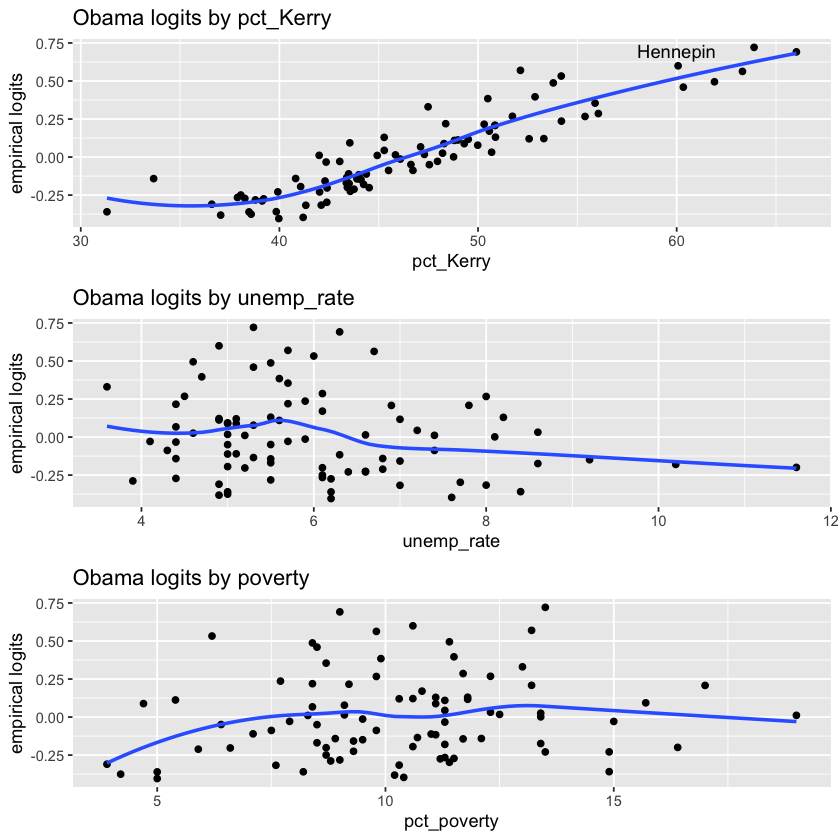

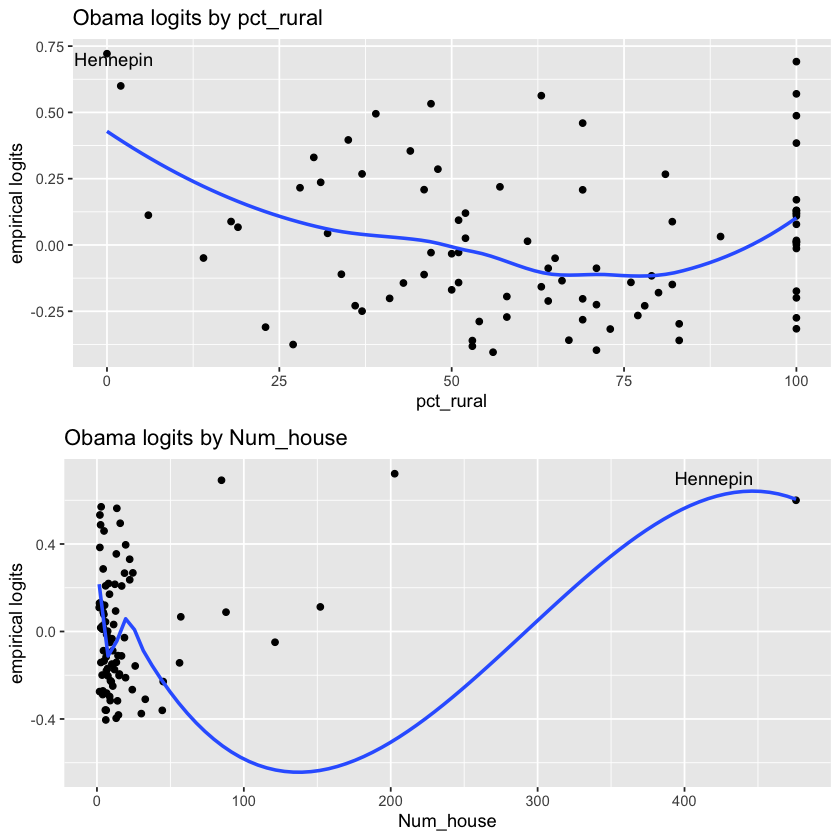

In [18]:
logkerry <- ggplot(final_data, aes(x = pct_Kerry, y = elogit))+
    geom_point(shpae = 1) +
    geom_smooth (method = loess,
                se = FALSE)+
    labs(x = "pct_Kerry",
        y = "empirical logits",
        title = "Obama logits by pct_Kerry")+
     geom_text(aes(label=Hennepin), x = 60, y = .7)


logunemp <- ggplot(final_data, aes(x = unemp_rate, y = elogit))+
    geom_point(shpae = 1) +
    geom_smooth (method = loess,
                se = FALSE)+
    labs(x = "unemp_rate",
        y = "empirical logits",
        title = "Obama logits by unemp_rate")

logpoverty <- ggplot(final_data, aes(x = pct_poverty, y = elogit))+
    geom_point(shpae = 1) +
    geom_smooth (method = loess,
                se = FALSE)+
    labs(x = "pct_poverty",
        y = "empirical logits",
        title = "Obama logits by poverty")

logrural <- ggplot(final_data, aes(x = pct_rural, y = elogit))+
    geom_point(shpae = 1) +
    geom_smooth (method = loess,
                se = FALSE)+
    labs(x = "pct_rural",
        y = "empirical logits",
        title = "Obama logits by pct_rural")+
    geom_text(aes(label=Hennepin), x = 1, y = .7)

loghouse <- ggplot(final_data, aes(x = Num_house, y = elogit))+
    geom_point(shpae = 1) +
    geom_smooth (method = loess,
                se = FALSE)+
    labs(x = "Num_house",
        y = "empirical logits",
        title = "Obama logits by Num_house")+
    geom_text(aes(label=Hennepin), x = 420, y = .7)


grid.arrange(logkerry, logunemp,logpoverty, ncol = 1)
grid.arrange(logrural,loghouse, ncol = 1)


In [ ]:
final_data[final_data$County == 'Hennepin',]

In [ ]:
model.1 <- glm(Obama/Num ~ pct_Kerry, weights = Num,
                  family = binomial, data = final_data)
summary(model.1)
exp(coef(model.1))

In [ ]:
model.2 <- glm(Obama/Num ~ pct_Kerry+unemp_rate, weights = Num,
                  family = binomial, data = final_data)
summary(model.2)
exp(coef(model.2))

In [ ]:
model.3 <- glm(Obama/Num ~ pct_Kerry+unemp_rate+pct_poverty, weights = Num,
                  family = binomial, data = final_data)
summary(model.3)
exp(coef(model.3))

In [ ]:
model.4 <- glm(Obama/Num ~ pct_Kerry+unemp_rate+pct_poverty+pct_rural, weights = Num,
                  family = binomial, data = final_data)
summary(model.4)
exp(coef(model.4))

In [47]:
model.5 <- glm(Obama/Num ~ pct_Kerry+unemp_rate+pct_poverty+pct_rural+
               unemp_rate:pct_rural, weights = Num,
                  family = binomial, data = final_data)
summary(model.5)
exp(coef(model.5))


Call:
glm(formula = Obama/Num ~ pct_Kerry + unemp_rate + pct_poverty + 
    pct_rural + unemp_rate:pct_rural, family = binomial, data = final_data, 
    weights = Num)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.5177   -3.0625   -0.5144    3.5984    9.5379  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.307e+00  2.368e-02  -55.18   <2e-16 ***
pct_Kerry             3.716e-02  1.708e-04  217.64   <2e-16 ***
unemp_rate           -9.317e-02  3.967e-03  -23.48   <2e-16 ***
pct_poverty           1.144e-02  4.412e-04   25.92   <2e-16 ***
pct_rural            -4.597e-03  3.004e-04  -15.30   <2e-16 ***
unemp_rate:pct_rural  7.717e-04  5.407e-05   14.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 92830.1  on 86  degrees of freedom
Residual deviance:  1887.5  on 81  degrees of freedom
AIC: 2761.

(Intercept)            pct_Kerry           unemp_rate 
           0.2706771            1.0378627            0.9110409 
         pct_poverty            pct_rural unemp_rate:pct_rural 
           1.0115022            0.9954131            1.0007720

In [53]:
model.6 <- glm(Obama/Num ~ pct_Kerry+unemp_rate+pct_poverty+pct_rural+Num_house+
               unemp_rate:pct_rural+pct_rural:pct_poverty+pct_poverty:unemp_rate, weights = Num,
                  family = binomial, data = final_data)
summary(model.6)
exp(coef(model.6))


Call:
glm(formula = Obama/Num ~ pct_Kerry + unemp_rate + pct_poverty + 
    pct_rural + Num_house + unemp_rate:pct_rural + pct_rural:pct_poverty + 
    pct_poverty:unemp_rate, family = binomial, data = final_data, 
    weights = Num)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.4934   -3.1681   -0.0018    3.2770   10.1498  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -1.363e+00  4.037e-02 -33.773  < 2e-16 ***
pct_Kerry               3.649e-02  2.150e-04 169.681  < 2e-16 ***
unemp_rate             -7.877e-02  7.977e-03  -9.875  < 2e-16 ***
pct_poverty             1.596e-02  3.267e-03   4.884 1.04e-06 ***
pct_rural              -4.075e-03  4.094e-04  -9.953  < 2e-16 ***
Num_house               7.487e-05  1.233e-05   6.070 1.28e-09 ***
unemp_rate:pct_rural    6.972e-04  6.561e-05  10.627  < 2e-16 ***
pct_poverty:pct_rural   8.734e-06  2.473e-05   0.353    0.724    
unemp_rate:pct_poverty -9.018e-0

(Intercept)              pct_Kerry             unemp_rate 
             0.2558175              1.0371607              0.9242554 
           pct_poverty              pct_rural              Num_house 
             1.0160852              0.9959332              1.0000749 
  unemp_rate:pct_rural  pct_poverty:pct_rural unemp_rate:pct_poverty 
             1.0006975              1.0000087              0.9990986

In [54]:
exp(confint(model.6))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.2363557,0.2768768
pct_Kerry,1.0367237,1.0375980
unemp_rate,0.9099195,0.9388199
pct_poverty,1.0096001,1.0226131
pct_rural,0.9951343,0.9967327
Num_house,1.0000507,1.0000990
unemp_rate:pct_rural,1.0005688,1.0008262
pct_poverty:pct_rural,0.9999603,1.0000572
unemp_rate:pct_poverty,0.9978081,1.0003904


In [86]:
anova(model.1,model.2,test = "Chisq" )
anova(model.2,model.3,test = "Chisq" )
anova(model.3,model.4,test = "Chisq" )
anova(model.4,model.5,test = "Chisq" )
anova(model.5,model.6,test = "Chisq" )

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,85,3745.688,NA,NA,NA
2,84,2736.068,1,1009.62,1.456571e-221


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,84,2736.068,NA,NA,NA
2,83,2140.782,1,595.2867,1.774127e-131


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,83,2140.782,NA,NA,NA
2,82,2090.994,1,49.78804,1.712851e-12


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,82,2090.994,NA,NA,NA
2,81,1887.454,1,203.5399,3.52681e-46


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,81,1887.454,NA,NA,NA
2,79,1880.162,2,7.292058,0.02609455


Warning message:
“Removed 86 rows containing missing values (geom_text).”


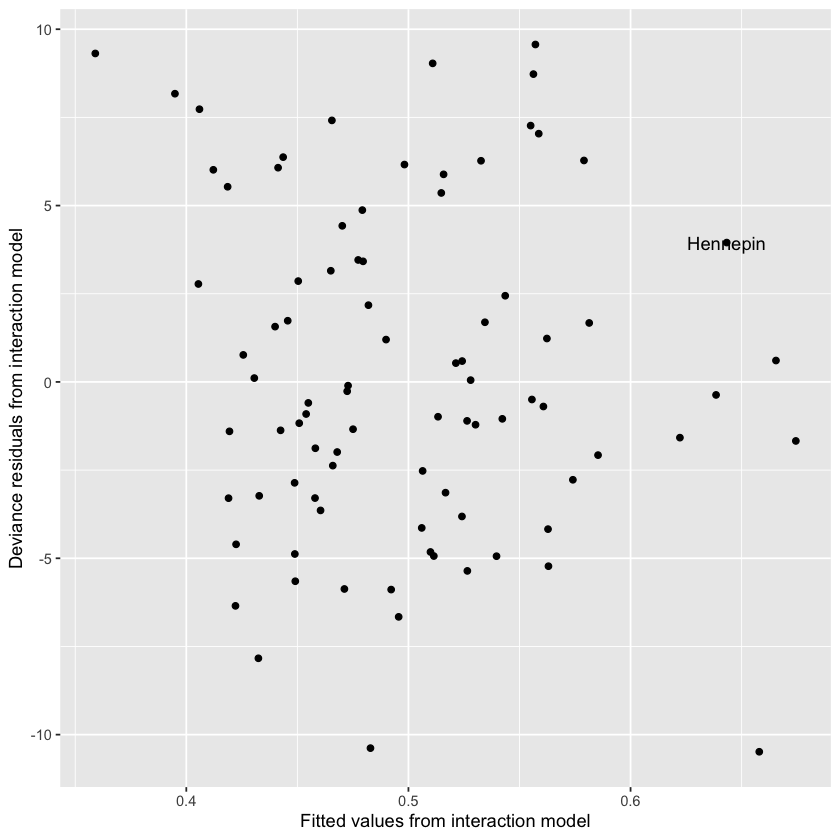

In [63]:
final_data <- final_data %>%
  mutate(resid.BxD = residuals(model.5), 
         fit.BxD = fitted.values(model.5))
ggplot(final_data, aes(x = fit.BxD, y = resid.BxD)) +
  geom_point() +
  geom_text(aes(label=Hennepin)) +
  xlab("Fitted values from interaction model") +
  ylab("Deviance residuals from interaction model")

In [68]:
final_model <- glm(Obama/Num ~ unemp_rate+pct_poverty+pct_rural+
               unemp_rate:pct_rural, weights = Num,
                  family = quasibinomial, data = final_data)
summary(final_model)
exp(coef(final_model))


Call:
glm(formula = Obama/Num ~ unemp_rate + pct_poverty + pct_rural + 
    unemp_rate:pct_rural, family = quasibinomial, data = final_data, 
    weights = Num)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-57.278  -16.652   -7.175    6.964  129.629  

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.563960   0.492403   3.176 0.002104 ** 
unemp_rate           -0.331985   0.095233  -3.486 0.000790 ***
pct_poverty           0.052028   0.009897   5.257 1.14e-06 ***
pct_rural            -0.026103   0.007095  -3.679 0.000417 ***
unemp_rate:pct_rural  0.004094   0.001298   3.155 0.002247 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 615.9602)

    Null deviance: 92830  on 86  degrees of freedom
Residual deviance: 50596  on 82  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 3


(Intercept)           unemp_rate          pct_poverty 
           4.7777031            0.7174983            1.0534051 
           pct_rural unemp_rate:pct_rural 
           0.9742349            1.0041027

[1] 4.827971

In [66]:
# quasibinomial model with distance and pctBlack and their interaction
final_model2 <- glm(Obama/Num ~ pct_Kerry+unemp_rate+pct_poverty+pct_rural+
               unemp_rate:pct_rural, weights = Num,
                  family = quasibinomial, data = final_data)
summary(final_model2)


Call:
glm(formula = Obama/Num ~ pct_Kerry + unemp_rate + pct_poverty + 
    pct_rural + unemp_rate:pct_rural, family = quasibinomial, 
    data = final_data, weights = Num)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.5177   -3.0625   -0.5144    3.5984    9.5379  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.3068288  0.1143331 -11.430  < 2e-16 ***
pct_Kerry             0.0371635  0.0008244  45.079  < 2e-16 ***
unemp_rate           -0.0931675  0.0191535  -4.864 5.56e-06 ***
pct_poverty           0.0114366  0.0021301   5.369 7.38e-07 ***
pct_rural            -0.0045975  0.0014503  -3.170  0.00215 ** 
unemp_rate:pct_rural  0.0007717  0.0002610   2.956  0.00408 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 23.3093)

    Null deviance: 92830.1  on 86  degrees of freedom
Residual deviance:  1887.5  on 81  degrees of fr

In [104]:
sqrt(23.3093)

[1] 4.827971

In [67]:
exp(confint(final_model2))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.2163295,0.3386566
pct_Kerry,1.0361885,1.0395425
unemp_rate,0.8774724,0.9458908
pct_poverty,1.0072876,1.0157337
pct_rural,0.9925882,0.9982474
unemp_rate:pct_rural,1.0002600,1.0012841


In [65]:
1-pchisq(1887.5,81)

[1] 0

In [93]:
# quasibinomial model with distance and pctBlack and their interaction
final_model <- glm(Obama/Num ~ pct_Kerry+unemp_rate+pct_rural+
               unemp_rate:pct_rural, weights = Num,
                  family = quasibinomial, data = final_data)
summary(final_model)


Call:
glm(formula = Obama/Num ~ pct_Kerry + unemp_rate + pct_rural + 
    unemp_rate:pct_rural, family = quasibinomial, data = final_data, 
    weights = Num)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-11.9875   -3.3726   -0.0494    4.7862   14.8880  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.3649324  0.1317329 -10.361  < 2e-16 ***
pct_Kerry             0.0390262  0.0008678  44.970  < 2e-16 ***
unemp_rate           -0.0807208  0.0220057  -3.668 0.000433 ***
pct_rural            -0.0039391  0.0016738  -2.353 0.020998 *  
unemp_rate:pct_rural  0.0006783  0.0003016   2.249 0.027200 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 31.2274)

    Null deviance: 92830  on 86  degrees of freedom
Residual deviance:  2559  on 82  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 3


In [94]:
exp(coef(final_model))

(Intercept)            pct_Kerry           unemp_rate 
           0.2553979            1.0397977            0.9224512 
           pct_rural unemp_rate:pct_rural 
           0.9960687            1.0006785

In [72]:
1-pchisq(2559,82)

[1] 0

In [103]:
exp(confint(final_model3))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.1972696,0.3306181
pct_Kerry,1.0380322,1.0415695
unemp_rate,0.8835102,0.9631079
pct_rural,0.9928074,0.9993431
unemp_rate:pct_rural,1.0000869,1.0012701


In [71]:
1-pchisq(2559,82)

[1] 0

In [96]:
exp(-0.085)

[1] 0.9185123